### 1. Import Python libraries
First of all, we will import all the necessary python libraries needed to dig deeper insights from the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import io
import requests

### 2. Load and analyze the dataset
The problem we are going to analyze is the one which contains GRE score, GPA and Rank of students who got admit or reject from an university. Thus, it is a **classification problem**, i.e. you need to tell whether a student will get an *admit* or *not*, if given his GRE score, GPA and Rank.

In [2]:
# assign the csv file link to a variable
  
# use pandas i/o to get the dataset
dataset = pd.read_csv("admission.csv")

In [3]:
# get the data type of dataset
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:

# look into the first five rows of the dataset
print(dataset.head())

   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [5]:
# get the shape of dataset - {rows,columns}
print(dataset.shape)

(400, 4)


In [6]:

# get some information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    float64
 1   gre     400 non-null    float64
 2   gpa     400 non-null    float64
 3   rank    400 non-null    float64
dtypes: float64(4)
memory usage: 12.6 KB
None


In [7]:
# count the number of non-NA values in the dataset
print(dataset.count())

admit    400
gre      400
gpa      400
rank     400
dtype: int64


In [8]:
# get info about the columns/attributes of the dataset
print(dataset.columns)

Index(['admit', 'gre', 'gpa', 'rank'], dtype='object')


### 3. Summarize the dataset

Let's get into some statistical analysis with the dataset. This initial process will aid us to get some basic understanding of the dataset.

In [9]:
# get the sum of values for each column/attribute in the dataset
print(dataset.sum())

admit       127.000000
gre      235080.000000
gpa        1355.960003
rank        994.000000
dtype: float64


In [10]:
# get the summary statistics of the dataset
print(dataset.describe())

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [11]:
# get the mean values of each column/attribute in the dataset
print(dataset.mean())

admit      0.3175
gre      587.7000
gpa        3.3899
rank       2.4850
dtype: float64


In [12]:
# get the median values of each column/attribute in the dataset
print(dataset.median())

admit      0.000
gre      580.000
gpa        3.395
rank       2.000
dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_46784\2368951082.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.iloc[:,1],  ax=ax1, color="r");
C:\Users\ASUS\AppData\Local\Temp\ipykernel_46784\2368951082.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset.iloc[:,2],  ax=ax2, col

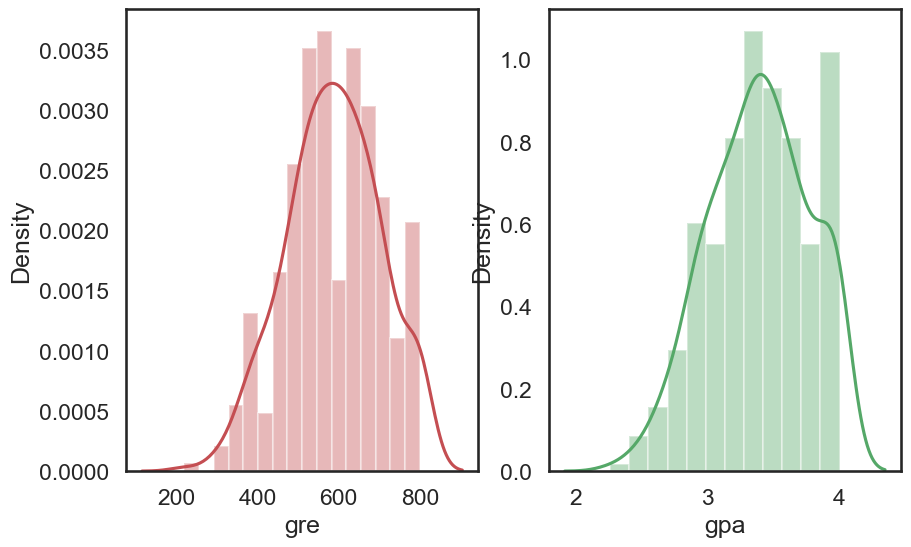

In [13]:
# seaborn and matplotlib are great libraries for Data Viz
import seaborn as sns
sns.set(style="white", context="talk")

# two plots as subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))

# plot GRE scores
sns.distplot(dataset.iloc[:,1],  ax=ax1, color="r");

# plot GPA grades
sns.distplot(dataset.iloc[:,2],  ax=ax2, color="g");

# display the plot 

In the above two plots, we could see that GRE score mostly fall within the range **(400-700)** and GPA grade mostly fall within the range **(3-4)**. This could not be guessed just by looking at the *raw csv file*. That is why we go for Data Visualization.

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


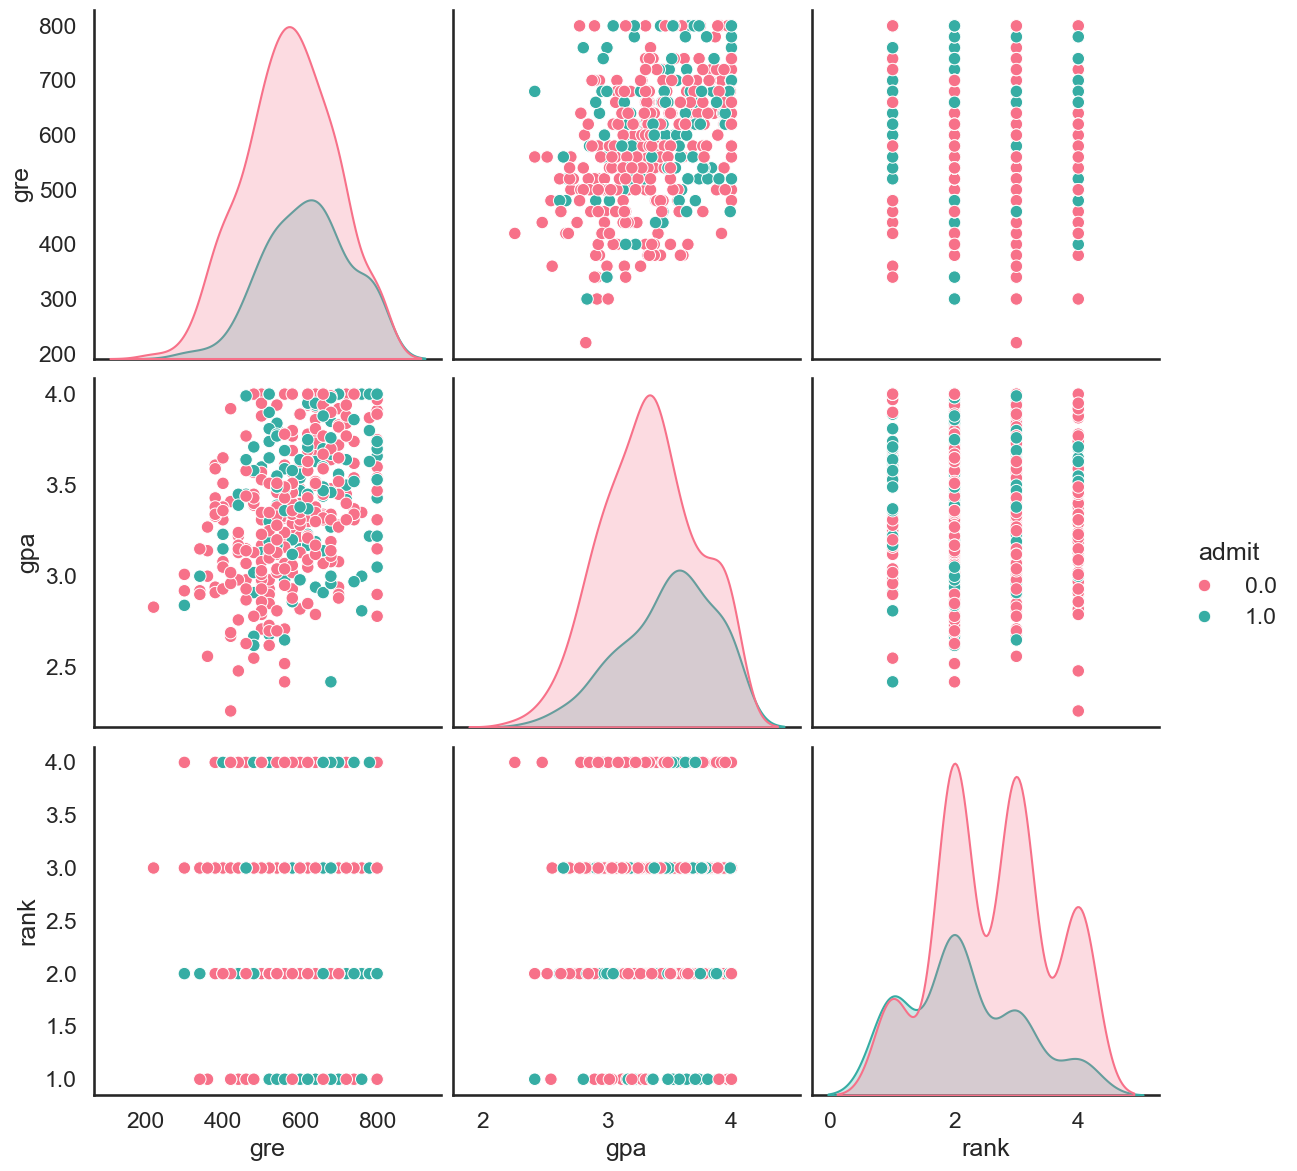

In [14]:
# multivariate analysis
sns.pairplot(dataset, hue='admit', palette="husl",
            x_vars=["gre", "gpa", "rank"],
            y_vars=["gre", "gpa", "rank"], size=4)

# display the plot 

From the above scatterplot matrix, we could see that (gpa vs gre) is **highly correlated**, i.e. we can't separate those values just by drawing a **straight line** or fit a simple **curve**. Instead, we use the power of machine learning models such as Logistic Regression, Linear Discriminant Analysis, K-Nearest Neighbors, Decision Trees, Random Forests, Gaussian Naive Bayes and Support Vector Machine. For detailed introduction to Machine Learning algorithms, please take the awesome course by **Professor Andrew NG** at Coursera. To apply those concepts using Python, I would suggest you to bookmark **Machine Learning Mastery** website taught by **Jason Brownlee**. It is one of the *best ML resources* in the web.

### 4. Machine Learning and Predictive Analysis

After getting enough information and visualizing the dataset, let's make our hands dirty by constructing **Machine Learning models** to perform predictive analysis. In this tutorial, we will explore different kinds of ML models that gives different accuracies on the same dataset. We will also explore how to split training and testing data from the original dataset, so that we can make the model learn from the training data and predict on the test data.

In [15]:
# organize imports
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [16]:
# convert the dataframe into a matrix
dataArray = dataset.values

In [17]:
# split the input features and output variable
X = dataArray[:,1:4]
y = dataArray[:,0:1]

# split training and testing dataset
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(360, 3)
(40, 3)
(360, 1)
(40, 1)


In [19]:
# prepare the models - {LR, LDA, KNN, CART, RF, NB, SVM}
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [20]:
# fit the models and evaluate it
results = []
names = []
scoring = 'accuracy'

# evaluate each model using 10-FOLD cross validation
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed w

LR: 0.697222 (0.089106)
LDA: 0.700000 (0.088541)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was pas

KNN: 0.658333 (0.079592)
CART: 0.619444 (0.059641)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 

RF: 0.683333 (0.048432)
NB: 0.688889 (0.088541)
SVM: 0.672222 (0.074328)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed w

On evaluating all the models, we find that LDA achieves a training accuracy of **70%**. This accuracy is pretty much good as our dataset is *highly correlated*. But, to make predictions on new data, we need to make predictions using any of the models on the test data.

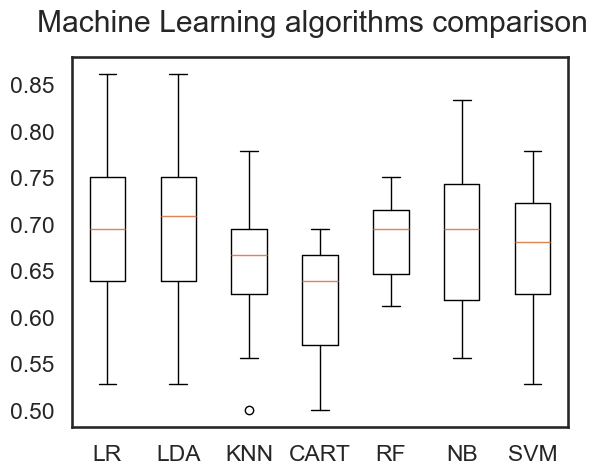

In [21]:
# boxplots for ML algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithms comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [22]:
# create the model
model = LogisticRegression()

# fit the model
model.fit(X_train, Y_train)

# make predictions on the test data
predictions = model.predict(X_test)

# compute the overall accuracy and display the classification report
print("Model --> Logistic Regression")
print("Overall Accuracy: {}".format(accuracy_score(Y_test, predictions) * 100))
print(classification_report(Y_test, predictions))

Model --> Logistic Regression
Overall Accuracy: 75.0
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85        31
         1.0       0.40      0.22      0.29         9

    accuracy                           0.75        40
   macro avg       0.60      0.56      0.57        40
weighted avg       0.71      0.75      0.72        40



C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have created and trained **Logistic Regression model** on the training data and made predictions on the test data. We get an overall accuracy of **77.5%**. Finally, to plot the confusion matrix, we make use of seaborn's heatmap.

<Figure size 216x216 with 0 Axes>

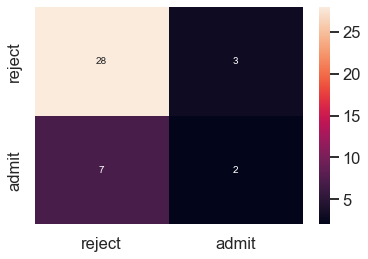

<Figure size 216x216 with 0 Axes>

In [36]:
# plot confusion matrix and display the heatmap
%matplotlib inline
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, 
            annot=True, 
            xticklabels=['reject', 'admit'], 
            yticklabels=['reject', 'admit'])
plt.figure(figsize=(3,3)) 

In [37]:
# make prediction on a new test data - (gre_score, gpa_grade, rank)
new_data = [(720, 4, 1), (300, 2, 1), (400, 4, 4)]

# convert the list of tuples to numpy array
new_array = np.asarray(new_data)

# the output labels
labels = ["reject", "admit"]

# make prediction
prediction = model.predict(new_array)

# get the no.of.test cases used
no_of_test_cases, cols = new_array.shape

In [38]:
# show the result
for i in range(no_of_test_cases):
    print("Status of STUDENT with GRE score= {}, GPA grade= {}, Rank= {} will be --> {}".format(new_data[i][0], new_data[i][1], new_data[i][2], labels[int(prediction[i])]))

Status of STUDENT with GRE score= 720, GPA grade= 4, Rank= 1 will be --> admit
Status of STUDENT with GRE score= 300, GPA grade= 2, Rank= 1 will be --> reject
Status of STUDENT with GRE score= 400, GPA grade= 4, Rank= 4 will be --> reject


As you can see, a student with a high GRE score of 720, good GPA grade of 4 and top rank of 1 will eventually get an **ADMIT**. While, the other two test cases got **REJECT** due to low GRE scores.